In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [21]:
train_dataset = pd.read_csv(r'C:\Users\svam\Desktop\jupyter-files\ML learnings\SL assessment Project\Dataset for the project\train.csv')
test_dataset = pd.read_csv(r'C:\Users\svam\Desktop\jupyter-files\ML learnings\SL assessment Project\Dataset for the project\test.csv')

# Performing EDA

In [4]:
train_dataset.shape

(9557, 143)

In [5]:
train_dataset.head().T

,0,1,2,3,4
Id,ID_279628684,ID_f29eb3ddd,ID_68de51c94,ID_d671db89c,ID_d56d6f5f5
v2a1,190000,135000,NaN,180000,180000
hacdor,0,0,0,0,0
rooms,3,4,8,5,5
hacapo,0,0,0,0,0
...,...,...,...,...,...
SQBovercrowding,1,1,0.25,1.77778,1.77778
SQBdependency,0,64,64,1,1
SQBmeaned,100,144,121,121,121
agesq,1849,4489,8464,289,1369


In [10]:
test_dataset.shape

(23856, 142)

In [12]:
#Finding the target column from the training dataset, which does not exist in the test dataset
for column in train_dataset.columns:
    if column not in test_dataset.columns:
            print('Target Column:', column)

Target Column: Target


1. "Target" column is the output variable which is present in the TRAIN dataset but not in TEST

In [15]:
train_dataset['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [17]:
train_dataset['Target'].value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

2. Understanding the type of data

In [6]:
train_dataset.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [9]:
float_df = train_dataset.select_dtypes(include=['float64'])
float_df.head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [10]:
object_df = train_dataset.select_dtypes(include=['object'])
object_df.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [15]:
# count of members in each household
household = train_dataset['idhogar'].value_counts()
household = household.rename_axis('idhogar').reset_index(name='Member count')
household

,idhogar,Member count
0,fd8a6d014,13
1,ae6cf0558,12
2,0c7436de6,12
3,6b35cdcf0,11
4,4476ccd4c,11
...,...,...
2983,ec9506d71,1
2984,a345485f7,1
2985,72c73d9a6,1
2986,223dab3ac,1


In [17]:
household['Member count'].value_counts()

3     755
2     688
4     609
1     398
5     315
6     136
7      52
8      12
9      10
10      6
11      4
12      2
13      1
Name: Member count, dtype: int64

In [18]:
train_dataset['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [19]:
train_dataset['edjefe'][(train_dataset['edjefe'] =='no') | (train_dataset['edjefe'] =='yes')].value_counts().sort_index()

no     3762
yes     123
Name: edjefe, dtype: int64

In [20]:
train_dataset['edjefe'].replace({'no':0, 'yes':1},inplace=True)
#train_dataset['edjefe'][(train_dataset['edjefe'] =='no') | (train_dataset['edjefe'] =='yes')].value_counts().sort_index()

In [28]:
 train_dataset[train_dataset['edjefe'].isin([0,1])]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.25,64.00,121.00,8464,4
11,ID_de822510c,100000.0,0,3,0,1,1,0,NaN,0,...,144,324,4,0,1,1.00,1.00,529.00,324,4
12,ID_d94071d7c,100000.0,0,3,0,1,1,0,NaN,0,...,121,1156,4,0,1,1.00,1.00,529.00,1156,4
13,ID_064b57869,NaN,0,4,0,1,1,1,1.0,0,...,16,6241,4,0,0,1.00,1.00,90.25,6241,4
14,ID_5c837d8a4,NaN,0,4,0,1,1,1,1.0,0,...,225,1521,4,0,0,1.00,1.00,90.25,1521,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,ID_cca751e53,NaN,0,4,0,1,0,0,NaN,1,...,16,841,25,0,9,6.25,2.25,20.25,841,2
9538,ID_bfbb06d62,NaN,0,4,0,1,0,0,NaN,1,...,0,36,25,0,9,6.25,2.25,20.25,36,2
9539,ID_e20c78904,NaN,0,4,0,1,0,0,NaN,1,...,0,36,25,0,9,6.25,2.25,20.25,36,2
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,36,3721,4,0,0,4.00,1.00,9.00,3721,2


In [29]:
train_dataset['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
.83333331      11
.22222222      11
1.2            11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [30]:
train_dataset['dependency'][(train_dataset['dependency'] =='no') | (train_dataset['dependency'] =='yes')].value_counts().sort_index()

no     1747
yes    2192
Name: dependency, dtype: int64

In [31]:
train_dataset['dependency'].replace({'no':0, 'yes':1},inplace=True)

In [32]:
train_dataset[train_dataset['dependency'].isin([0,1])]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,ID_6309f1595,45000.0,0,3,0,1,0,0,NaN,0,...,256,961,1,0,0,1.000000,0.0,256.0,961,4
9529,ID_f8b8c7703,NaN,0,1,0,1,1,0,NaN,0,...,36,2116,4,36,0,4.000000,0.0,36.0,2116,4
9530,ID_7226bda20,NaN,0,1,0,1,1,0,NaN,0,...,36,2704,4,36,0,4.000000,0.0,36.0,2704,4
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,36,3721,4,0,0,4.000000,1.0,9.0,3721,2


In [43]:
train_nan = pd.DataFrame(train_dataset.isnull().sum()).rename(columns={0:'total'})
#train_nan['NaN_Percent'] = round(100*(train_nan['total']/train_dataset.shape[0]),2)
train_nan_7 = train_nan.sort_values('total',ascending= False ).head(10)

Text(0.5, 1.0, 'Count Of NaN Values')

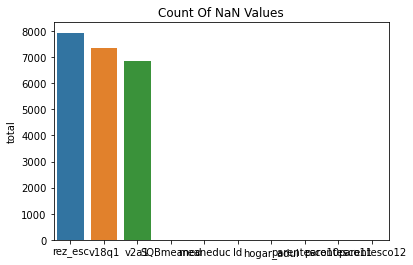

In [45]:
# Taking top 5 columns that have the null values
#plot_copy = train_nan.sort_values('NaN_Percent',ascending= False ).head(5)
sns.barplot(y=train_nan_7['total'],x=train_nan_7.index)
plt.title('Count Of NaN Values')

Text(0.5, 1.0, 'NaN Distribution Based On Ownership Type')

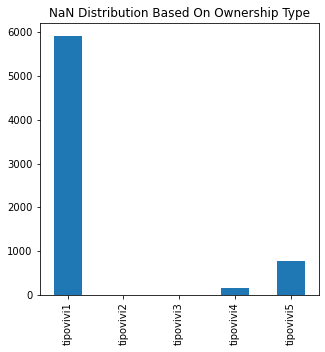

In [46]:
ownership_columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
train_dataset.loc[train_dataset['v2a1'].isnull(), ownership_columns].sum().plot.bar(figsize=(5,5))
plt.title('NaN Distribution Based On Ownership Type')

In [44]:
train_dataset['tipovivi2'].unique()

array([0, 1], dtype=int64)

In [48]:
#Replacing the v2a1's Nulls with 0
train_dataset['v2a1'].fillna(value=0, inplace=True)
train_dataset['v2a1'].isnull().sum()

0

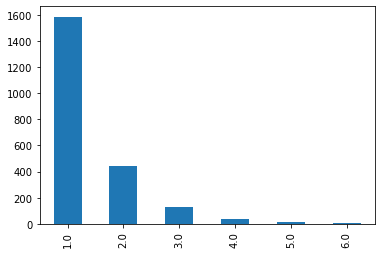

In [49]:
train_dataset['v18q1'].value_counts().sort_index().plot.bar()

In [45]:
train_dataset['v18q1'].value_counts()

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [50]:
# Returns Number of nulls
def count_null(data):
    return data.isnull().sum()

In [51]:
Household_head = train_dataset[train_dataset['parentesco1']==1].copy()
Household_head.groupby('v18q')['v18q1'].apply(count_null)

v18q
0    2318
1       0
Name: v18q1, dtype: int64

In [4]:
# Replacing the v18q1's Nulls with 0

train_dataset['v18q1'].fillna(value=0, inplace=True)
print('Current Count Of Nulls In v18q1:',train_dataset['v18q1'].isnull().sum())

Current Count Of Nulls In v18q1: 0


In [5]:
print(train_dataset.loc[(train_dataset['rez_esc'].notnull()) ,'age'].describe())


count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64


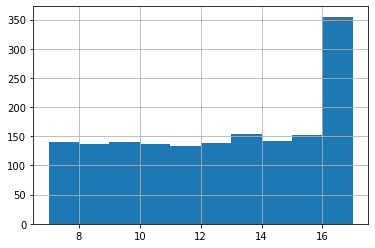

In [6]:
train_dataset.loc[train_dataset['rez_esc'].notnull(),'age'].hist()

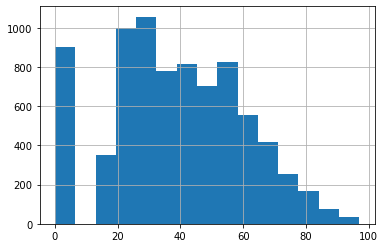

In [7]:
train_dataset.loc[(train_dataset['rez_esc'].isnull()) ,'age'].hist(bins=15)

In [8]:
train_dataset.loc[(train_dataset['rez_esc'].isnull()) & ((train_dataset['age']>=7)&(train_dataset['age']<=17)),'age'].count()

1

In [22]:
mapping = {'no':0,'yes':1}

# edjefe, edjefa, dependancy

train_dataset['edjefe'] = train_dataset['edjefe'].replace(mapping)
train_dataset['edjefa'] = train_dataset['edjefa'].replace(mapping)
train_dataset['dependency'] = train_dataset['dependency'].replace(mapping).astype(np.float64)


In [23]:
# Replacing Null values
train_dataset['v2a1'].fillna(value=0, inplace=True)
train_dataset['v18q1'].fillna(value=0, inplace=True)
train_dataset['rez_esc'].fillna(value=0, inplace=True)
train_dataset['meaneduc'].fillna(value=0, inplace=True)
train_dataset['SQBmeaned'].fillna(value=0, inplace=True)
train_nulls_count = train_dataset.isnull().sum()
train_nulls_count[train_nulls_count>0]

Series([], dtype: int64)

In [24]:
train_drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                    'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
                     'agesq','area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']
train_dataset.drop(columns=train_drop_columns, inplace=True)
train_dataset.shape

(9557, 127)

Target Column Analysis (Check For Biases)

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


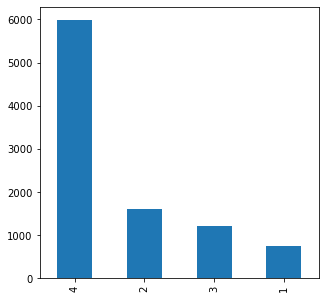

In [46]:
train_dataset['Target'].value_counts().plot.bar(figsize=(5,5))
print(train_dataset['Target'].value_counts())

Model Training

In [25]:
from sklearn.model_selection import train_test_split

X = train_dataset.iloc[:,:-1]
y = train_dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [26]:
shapes = shapes= [X_train.shape,y_train.shape, X_test.shape,y_test.shape]
shapes

[(7645, 126), (7645,), (1912, 126), (1912,)]

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(#max_leaf_nodes = 32,
                                     n_estimators=100,
                                     oob_score = True,
                                     n_jobs = -1,
                                     criterion = 'gini')

print(RF_classifier)

RandomForestClassifier(n_jobs=-1, oob_score=True)


In [28]:
from sklearn import metrics

In [31]:
RF_classifier.fit(X_train, y_train)
y_pred_rf = RF_classifier.predict(X_test)

print('Random Forest R2 Score', metrics.r2_score(y_train,RF_classifier.predict(X_train)))
print('Random Forest OOB Score',RF_classifier.oob_score_ )


Random Forest R2 Score 1.0
Random Forest OOB Score 0.9272727272727272


Prediction Accuracy

In [32]:
print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred_rf, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           1       0.96      0.85      0.90       164
           2       0.92      0.87      0.90       311
           3       0.98      0.79      0.87       254
           4       0.93      0.99      0.96      1183

    accuracy                           0.93      1912
   macro avg       0.95      0.87      0.91      1912
weighted avg       0.94      0.93      0.93      1912

[[ 139    8    0   17]
 [   4  271    3   33]
 [   2    8  200   44]
 [   0    6    2 1175]]
Accuracy of the model on Testing Sample Data: 0.93


In [33]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
RF_classifier_kfold = RandomForestClassifier(n_estimators=100,
                                            n_jobs = -1, random_state=10
                                            )
RF_classifier_kfold.fit(X_train,y_train)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X , y, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.93723849 0.91736402 0.92098378 0.93720565 0.9392988 ]

Final Average Accuracy of the model: 93.04


On Test dataset

In [47]:
mapping = {'no':0,'yes':1}

# edjefe, edjefa, dependancy

test_dataset['edjefe'] = test_dataset['edjefe'].replace(mapping)
test_dataset['edjefa'] = test_dataset['edjefa'].replace(mapping)
test_dataset['dependency'] = test_dataset['dependency'].replace(mapping).astype(np.float64)

In [48]:
# Replacing Null values
test_dataset['v2a1'].fillna(value=0, inplace=True)
test_dataset['v18q1'].fillna(value=0, inplace=True)
test_dataset['rez_esc'].fillna(value=0, inplace=True)
test_dataset['meaneduc'].fillna(value=0, inplace=True)
test_dataset['SQBmeaned'].fillna(value=0, inplace=True)
train_nulls_count = test_dataset.isnull().sum()
train_nulls_count[train_nulls_count>0]

Series([], dtype: int64)

In [49]:
train_drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                    'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
                     'agesq','area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']
test_dataset.drop(columns=train_drop_columns, inplace=True)
test_dataset.shape

(23856, 126)

In [55]:
RF_classifier_kfold.fit(X_test,y_pred_rf)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X_test , y_pred_rf, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.78851175 0.81201044 0.77748691 0.78010471 0.79057592]

Final Average Accuracy of the model: 78.97


In [56]:
RF_classifier_kfold.fit(X_test,y_test)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X_test , y_test, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.75718016 0.75456919 0.7382199  0.73560209 0.7565445 ]

Final Average Accuracy of the model: 74.84


In [52]:
# K Fold model prediction
test_data_prediction_kfold = RF_classifier_kfold.predict(test_dataset)
test_data_prediction_kfold

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)